In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
!pip install pandas_datareader
import pandas_datareader as data
from datetime import datetime

In [4]:
start = '2010-01-01'
end='2020-12-3`1'

df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415356
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526477
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791


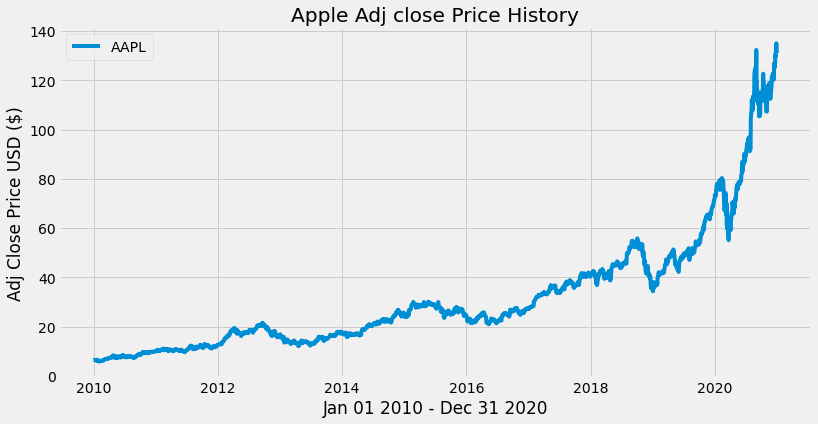

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df['Adj Close'],label='AAPL')
plt.title('Apple Adj close Price History')
plt.xlabel('Jan 01 2010 - Dec 31 2020')
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc='upper left')
plt.show()

In [6]:
sma30=pd.DataFrame()
sma30['Adj Close']=df['Adj Close'].rolling(window=30).mean()
sma30

,Adj Close
Date,
2009-12-31,NaN
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
...,...
2020-12-24,121.056135
2020-12-28,121.631890
2020-12-29,122.146051


In [7]:
sma100=pd.DataFrame()
sma100['Adj Close']=df['Adj Close'].rolling(window=100).mean()
sma100

,Adj Close
Date,
2009-12-31,NaN
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
...,...
2020-12-24,116.686543
2020-12-28,116.953487
2020-12-29,117.164636


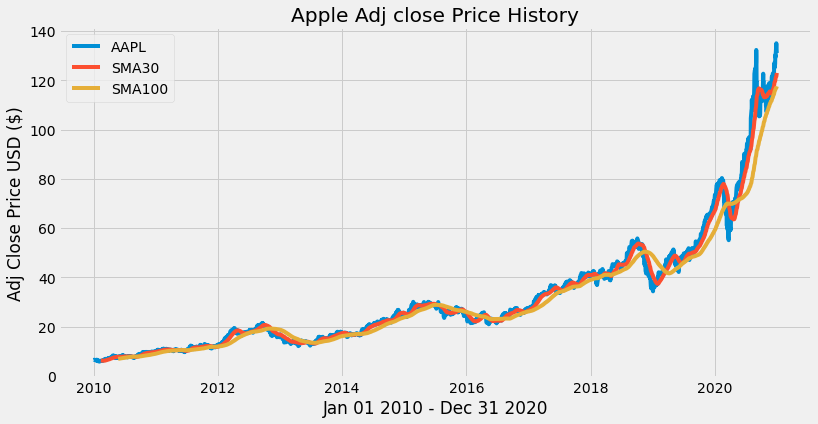

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['Adj Close'],label='AAPL')
plt.plot(sma30['Adj Close'],label='SMA30')
plt.plot(sma100['Adj Close'],label='SMA100')
plt.title('Apple Adj close Price History')
plt.xlabel('Jan 01 2010 - Dec 31 2020')
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc='upper left')
plt.show()

In [9]:
data=pd.DataFrame()
data['AAPL']=df['Adj Close']
data['SMA30']=sma30['Adj Close']
data['SMA100']=sma100['Adj Close']
data

,AAPL,SMA30,SMA100
Date,,,
2009-12-31,6.415356,NaN,NaN
2010-01-04,6.515213,NaN,NaN
2010-01-05,6.526477,NaN,NaN
2010-01-06,6.422665,NaN,NaN
2010-01-07,6.410791,NaN,NaN
...,...,...,...
2020-12-24,130.404587,121.056135,116.686543
2020-12-28,135.068588,121.631890,116.953487
2020-12-29,133.270187,122.146051,117.164636


In [10]:
#creating a function for when to buy and sell the asset/stock
def buy_sell(data):
    sigpricebuy = []
    sigpricesell = []
    flag = -1
    
    for i in range(len(data)):
        if(data['SMA30'][i]>data['SMA100'][i]):
            if flag!=1:
                sigpricebuy.append(data['AAPL'][i])
                sigpricesell.append(np.nan)
                flag=1
            else:
                sigpricebuy.append(np.nan)
                sigpricesell.append(np.nan)
        elif(data['SMA30'][i]<data['SMA100'][i]):
            if flag!=0:
                sigpricebuy.append(np.nan)
                sigpricesell.append(data['AAPL'][i])
                flag=0
            else:
                sigpricebuy.append(np.nan)
                sigpricesell.append(np.nan) 
        else:
            sigpricebuy.append(np.nan)
            sigpricesell.append(np.nan)
        
    return (sigpricebuy,sigpricesell)

In [11]:
#store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [12]:
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2009-12-31,6.415356,NaN,NaN,NaN,NaN
2010-01-04,6.515213,NaN,NaN,NaN,NaN
2010-01-05,6.526477,NaN,NaN,NaN,NaN
2010-01-06,6.422665,NaN,NaN,NaN,NaN
2010-01-07,6.410791,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-12-24,130.404587,121.056135,116.686543,NaN,NaN
2020-12-28,135.068588,121.631890,116.953487,NaN,NaN
2020-12-29,133.270187,122.146051,117.164636,NaN,NaN


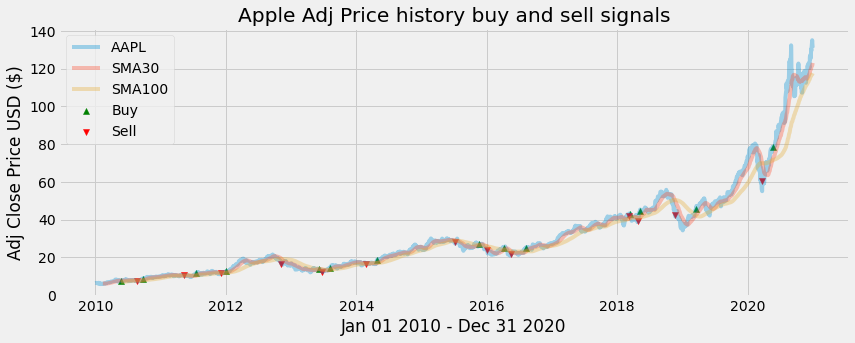

In [13]:
plt.figure(figsize=(12.6,4.6))
plt.plot(data['AAPL'],label='AAPL',alpha=0.35)
plt.plot(data['SMA30'],label='SMA30',alpha=0.35)
plt.plot(data['SMA100'],label='SMA100',alpha=0.35)
plt.scatter(data.index,data['Buy_Signal_Price'],label='Buy',marker='^',color='g')
plt.scatter(data.index,data['Sell_Signal_Price'],label='Sell',marker='v',color='r')
plt.title('Apple Adj Price history buy and sell signals')
plt.xlabel('Jan 01 2010 - Dec 31 2020')
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc='upper left')
plt.show()